<a href="https://colab.research.google.com/github/MPGarg/Assignment-13/blob/main/EVA8_Assigment_13_Part_2_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
from __future__ import print_function
import torch.optim as optim
from torchvision import datasets, transforms
import torch
import torch.nn.functional as F
import torchvision
#from torchsummary import summary
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt

In [ ]:
#!pip install -U albumentations
!pip install torch_lr_finder
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torch_lr_finder import LRFinder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.9/dist-packages/torch_lr_finder/lr_finder.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


# Import files from GIT Hub

In [ ]:
!git clone https://github.com/MPGarg/main_repo.git

Cloning into 'main_repo'...
remote: Enumerating objects: 285, done.
remote: Counting objects: 100% (107/107), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 285 (delta 54), reused 86 (delta 42), pack-reused 178
Receiving objects: 100% (285/285), 90.82 KiB | 2.16 MiB/s, done.
Resolving deltas: 100% (135/135), done.


# VAE class is imported

In [ ]:
from main_repo.models import vae
from main_repo.models.vae import cVAE

# Import Other fuctions

In [ ]:
from main_repo import main, utils
from main_repo.utils import *    
from main_repo.main import *

# Assign device

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [ ]:
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

[INFO] Couldn't find torchinfo... installing it.


In [ ]:
from torchsummary import summary
view_model = cVAE((3, 32, 32), 10, nhid = 2, ncond = 16,device=device).to(device)
#summary(view_model, input_size=(1,28,28))
view_model

cVAE(
  (encoder): Encoder(
    (encode): Sequential(
      (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
      (8): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (9): ReLU(inplace=True)
      (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
      (11): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (12): ReLU(inplace=True)
      (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (14): Flatten()
      (15): MLP(
    

# Dataset

In [ ]:
train_loader = torch.utils.data.DataLoader(
    datasets.CIFAR10('data', train=True, download=True,
                    transform=transforms.ToTensor()),
    batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    datasets.CIFAR10('data', train=False, transform=transforms.ToTensor(),download=True),
    batch_size=25)

100%|██████████| 170498071/170498071 [00:01<00:00, 85405682.69it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


# VAE

In [ ]:
learning_rate = 0.001
model = cVAE((3, 32, 32), 10, nhid = 16, ncond = 16,device=device).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.BCELoss(reduction = "sum")

In [ ]:
model_tr1, train_losses1 = fit_model_vae(
                                          model=model, 
                                          device=device,
                                          trainloader=train_loader, 
                                          criterion = criterion,
                                          EPOCHS=100,
                                          optimizer=optimizer,
                                          scheduler=None                                                
                                            )


EPOCH: 1 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 33.05it/s]



Average Training Loss=1959.66046

EPOCH: 2 (LR: 0.001)


100%|██████████| 391/391 [00:10<00:00, 36.07it/s]



Average Training Loss=1927.382261875

EPOCH: 3 (LR: 0.001)


100%|██████████| 391/391 [00:10<00:00, 36.24it/s]



Average Training Loss=1924.9378925

EPOCH: 4 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 33.64it/s]



Average Training Loss=1910.0500378125

EPOCH: 5 (LR: 0.001)


100%|██████████| 391/391 [00:10<00:00, 36.09it/s]



Average Training Loss=1889.8763184375

EPOCH: 6 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 35.44it/s]



Average Training Loss=1879.9205234375

EPOCH: 7 (LR: 0.001)


100%|██████████| 391/391 [00:10<00:00, 36.33it/s]



Average Training Loss=1876.7137025

EPOCH: 8 (LR: 0.001)


100%|██████████| 391/391 [00:10<00:00, 36.23it/s]



Average Training Loss=1873.60992625

EPOCH: 9 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 35.23it/s]



Average Training Loss=1867.8651628125

EPOCH: 10 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 35.19it/s]



Average Training Loss=1864.9592409375

EPOCH: 11 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 35.27it/s]



Average Training Loss=1860.32918375

EPOCH: 12 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 35.46it/s]



Average Training Loss=1857.270529375

EPOCH: 13 (LR: 0.001)


100%|██████████| 391/391 [00:10<00:00, 35.79it/s]



Average Training Loss=1856.0580821875

EPOCH: 14 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 35.39it/s]



Average Training Loss=1855.3791271875

EPOCH: 15 (LR: 0.001)


100%|██████████| 391/391 [00:10<00:00, 35.64it/s]



Average Training Loss=1854.630000625

EPOCH: 16 (LR: 0.001)


100%|██████████| 391/391 [00:10<00:00, 35.91it/s]



Average Training Loss=1853.6575428125

EPOCH: 17 (LR: 0.001)


100%|██████████| 391/391 [00:10<00:00, 37.19it/s]



Average Training Loss=1853.447334375

EPOCH: 18 (LR: 0.001)


100%|██████████| 391/391 [00:10<00:00, 36.66it/s]



Average Training Loss=1852.9183365625

EPOCH: 19 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 35.45it/s]



Average Training Loss=1852.250420625

EPOCH: 20 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 35.09it/s]



Average Training Loss=1851.884318125

EPOCH: 21 (LR: 0.001)


100%|██████████| 391/391 [00:10<00:00, 35.64it/s]



Average Training Loss=1851.64900875

EPOCH: 22 (LR: 0.001)


100%|██████████| 391/391 [00:10<00:00, 35.97it/s]



Average Training Loss=1851.5627321875

EPOCH: 23 (LR: 0.001)


100%|██████████| 391/391 [00:10<00:00, 35.96it/s]



Average Training Loss=1850.7260340625

EPOCH: 24 (LR: 0.001)


100%|██████████| 391/391 [00:10<00:00, 35.78it/s]



Average Training Loss=1850.2272765625

EPOCH: 25 (LR: 0.001)


100%|██████████| 391/391 [00:10<00:00, 36.02it/s]



Average Training Loss=1850.3998678125

EPOCH: 26 (LR: 0.001)


100%|██████████| 391/391 [00:10<00:00, 35.60it/s]



Average Training Loss=1849.89485375

EPOCH: 27 (LR: 0.001)


100%|██████████| 391/391 [00:10<00:00, 36.05it/s]



Average Training Loss=1849.5823825

EPOCH: 28 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 35.27it/s]



Average Training Loss=1849.3978996875

EPOCH: 29 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 35.38it/s]



Average Training Loss=1849.4249240625

EPOCH: 30 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 35.47it/s]



Average Training Loss=1848.8591125

EPOCH: 31 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 35.48it/s]



Average Training Loss=1848.4633021875

EPOCH: 32 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 35.35it/s]



Average Training Loss=1848.4127434375

EPOCH: 33 (LR: 0.001)


100%|██████████| 391/391 [00:10<00:00, 35.60it/s]



Average Training Loss=1848.4441034375

EPOCH: 34 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 35.29it/s]



Average Training Loss=1848.124990625

EPOCH: 35 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 35.51it/s]



Average Training Loss=1847.8314109375

EPOCH: 36 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 34.96it/s]



Average Training Loss=1847.605693125

EPOCH: 37 (LR: 0.001)


100%|██████████| 391/391 [00:10<00:00, 37.64it/s]



Average Training Loss=1847.521031875

EPOCH: 38 (LR: 0.001)


100%|██████████| 391/391 [00:10<00:00, 35.65it/s]



Average Training Loss=1847.550039375

EPOCH: 39 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 35.01it/s]



Average Training Loss=1847.11935125

EPOCH: 40 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 35.02it/s]



Average Training Loss=1846.5290890625

EPOCH: 41 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 34.46it/s]



Average Training Loss=1846.7236153125

EPOCH: 42 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 34.39it/s]



Average Training Loss=1846.5642078125

EPOCH: 43 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 33.88it/s]



Average Training Loss=1846.301590625

EPOCH: 44 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 34.84it/s]



Average Training Loss=1846.1959728125

EPOCH: 45 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 35.31it/s]



Average Training Loss=1845.9854115625

EPOCH: 46 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 34.78it/s]



Average Training Loss=1845.81052625

EPOCH: 47 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 35.13it/s]



Average Training Loss=1845.9587871875

EPOCH: 48 (LR: 0.001)


100%|██████████| 391/391 [00:10<00:00, 36.55it/s]



Average Training Loss=1845.324424375

EPOCH: 49 (LR: 0.001)


100%|██████████| 391/391 [00:10<00:00, 35.85it/s]



Average Training Loss=1845.6444815625

EPOCH: 50 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 34.60it/s]



Average Training Loss=1845.541353125

EPOCH: 51 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 34.23it/s]



Average Training Loss=1845.49508125

EPOCH: 52 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 35.04it/s]



Average Training Loss=1845.29972875

EPOCH: 53 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 34.86it/s]



Average Training Loss=1844.782253125

EPOCH: 54 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 35.33it/s]



Average Training Loss=1844.856429375

EPOCH: 55 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 34.95it/s]



Average Training Loss=1844.74865875

EPOCH: 56 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 35.06it/s]



Average Training Loss=1844.2306990625

EPOCH: 57 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 34.27it/s]



Average Training Loss=1844.5025975

EPOCH: 58 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 35.09it/s]



Average Training Loss=1844.685830625

EPOCH: 59 (LR: 0.001)


100%|██████████| 391/391 [00:10<00:00, 35.95it/s]



Average Training Loss=1844.2880534375

EPOCH: 60 (LR: 0.001)


100%|██████████| 391/391 [00:10<00:00, 37.33it/s]



Average Training Loss=1844.391908125

EPOCH: 61 (LR: 0.001)


100%|██████████| 391/391 [00:10<00:00, 35.61it/s]



Average Training Loss=1843.893295

EPOCH: 62 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 35.29it/s]



Average Training Loss=1844.0787846875

EPOCH: 63 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 34.86it/s]



Average Training Loss=1843.843784375

EPOCH: 64 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 34.81it/s]



Average Training Loss=1843.562264375

EPOCH: 65 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 35.15it/s]



Average Training Loss=1843.5740946875

EPOCH: 66 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 35.35it/s]



Average Training Loss=1843.5017178125

EPOCH: 67 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 34.86it/s]



Average Training Loss=1843.5916815625

EPOCH: 68 (LR: 0.001)


100%|██████████| 391/391 [00:10<00:00, 35.72it/s]



Average Training Loss=1843.292019375

EPOCH: 69 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 35.53it/s]



Average Training Loss=1843.5830740625

EPOCH: 70 (LR: 0.001)


100%|██████████| 391/391 [00:10<00:00, 36.74it/s]



Average Training Loss=1843.269955625

EPOCH: 71 (LR: 0.001)


100%|██████████| 391/391 [00:10<00:00, 35.68it/s]



Average Training Loss=1843.255308125

EPOCH: 72 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 34.77it/s]



Average Training Loss=1842.8248421875

EPOCH: 73 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 34.58it/s]



Average Training Loss=1842.8857190625

EPOCH: 74 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 34.89it/s]



Average Training Loss=1842.7786928125

EPOCH: 75 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 34.86it/s]



Average Training Loss=1843.191851875

EPOCH: 76 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 35.48it/s]



Average Training Loss=1842.66438

EPOCH: 77 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 35.46it/s]



Average Training Loss=1842.8411440625

EPOCH: 78 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 35.30it/s]



Average Training Loss=1842.66946375

EPOCH: 79 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 35.04it/s]



Average Training Loss=1842.368825

EPOCH: 80 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 35.34it/s]



Average Training Loss=1842.2347896875

EPOCH: 81 (LR: 0.001)


100%|██████████| 391/391 [00:10<00:00, 36.37it/s]



Average Training Loss=1842.07198125

EPOCH: 82 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 35.46it/s]



Average Training Loss=1842.45154125

EPOCH: 83 (LR: 0.001)


100%|██████████| 391/391 [00:10<00:00, 35.67it/s]



Average Training Loss=1842.203986875

EPOCH: 84 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 35.20it/s]



Average Training Loss=1842.1563334375

EPOCH: 85 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 34.66it/s]



Average Training Loss=1842.125574375

EPOCH: 86 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 34.69it/s]



Average Training Loss=1841.9709721875

EPOCH: 87 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 34.95it/s]



Average Training Loss=1841.7061125

EPOCH: 88 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 35.15it/s]



Average Training Loss=1841.96605625

EPOCH: 89 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 35.23it/s]



Average Training Loss=1841.7377321875

EPOCH: 90 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 35.11it/s]



Average Training Loss=1841.7312959375

EPOCH: 91 (LR: 0.001)


100%|██████████| 391/391 [00:10<00:00, 35.83it/s]



Average Training Loss=1841.889715

EPOCH: 92 (LR: 0.001)


100%|██████████| 391/391 [00:10<00:00, 36.55it/s]



Average Training Loss=1841.6501734375

EPOCH: 93 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 35.47it/s]



Average Training Loss=1841.7600553125

EPOCH: 94 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 35.48it/s]



Average Training Loss=1841.6210609375

EPOCH: 95 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 35.33it/s]



Average Training Loss=1841.4483796875

EPOCH: 96 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 35.08it/s]



Average Training Loss=1841.4142790625

EPOCH: 97 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 34.86it/s]



Average Training Loss=1841.234288125

EPOCH: 98 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 34.50it/s]



Average Training Loss=1841.074065625

EPOCH: 99 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 35.36it/s]



Average Training Loss=1841.141470625

EPOCH: 100 (LR: 0.001)


100%|██████████| 391/391 [00:11<00:00, 35.49it/s]


Average Training Loss=1840.80410125


# Generate Image

In [ ]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
number = 1
with torch.no_grad():
    x = model.generate(number)

In [ ]:
from matplotlib import pyplot as plt
from matplotlib import cm

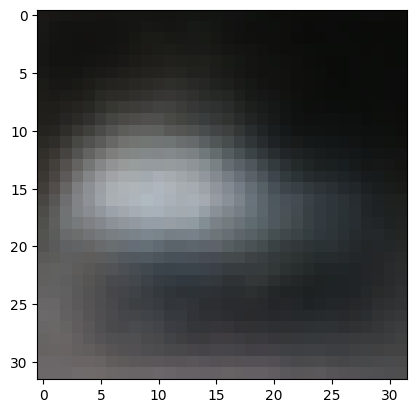

In [ ]:
plt.imshow(np.transpose(x.squeeze(0).cpu().numpy(), (1, 2, 0)))

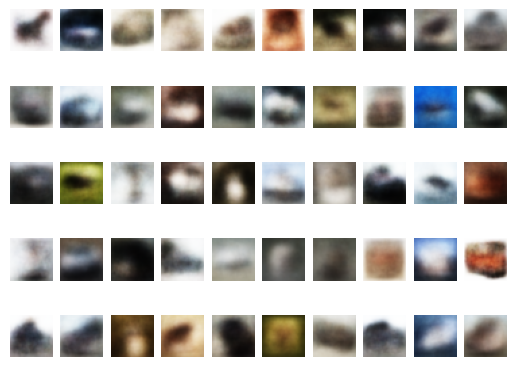

In [ ]:
with torch.no_grad():
    x = model.generate(torch.tensor([list(range(10))] * 5).clone().view(-1))
    
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.axis("off")
    plt.imshow(np.transpose(x[i].squeeze(0).cpu().numpy(), (1, 2, 0)))

# Incorrect Labels

In [ ]:
dataiter = iter(train_loader)
data_next = next(dataiter)
images, labels = data_next

In [ ]:
labels_1 = []
for i in labels:
    incorrect_label = torch.randint(low=0, high=10, size=(1,)).item()
    while incorrect_label == i:
        incorrect_label = torch.randint(low=0, high=10, size=(1,)).item()
    labels_1.append(incorrect_label)

In [ ]:
labels_c = torch.IntTensor(labels_1)
images, labels_c = images.to(device), labels_c.to(device)
labels = labels.to(device)
with torch.no_grad():
    X_hat1, _,_ = model(images, labels)

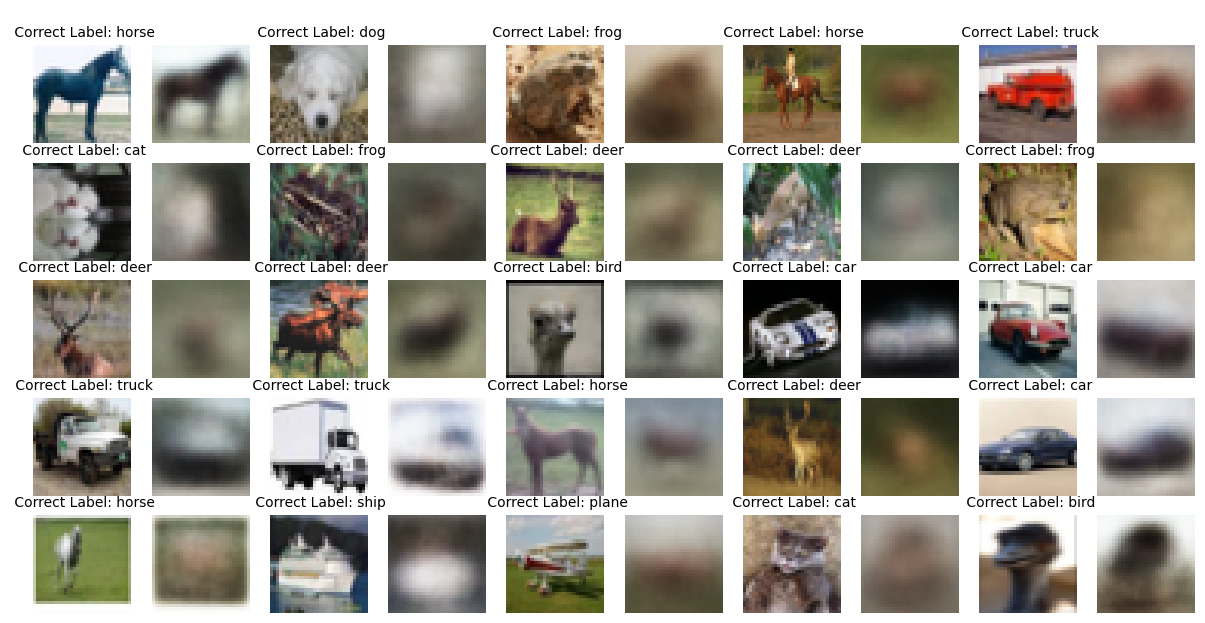

In [ ]:
j = 0
fig = plt.figure(figsize=(15,15))
for i in range(25):
    lbl_corr = labels[i]
    img_corr = images[i]
    img_new = X_hat1[i]
    lbl_new = labels[i]
    j = j+1
    ax = fig.add_subplot(10, 10,j )
    ax.axis("off")
    ax.imshow(np.transpose(img_corr.squeeze(0).cpu().numpy(), (1, 2, 0)))   
    ax.set_title(f'\n Correct Label: {classes[lbl_new.detach()]}',fontsize=10)  
    j = j+1
    ax = fig.add_subplot(10, 10, j)
    ax.axis("off")
    ax.imshow(np.transpose(img_new.squeeze(0).cpu().detach().numpy(), (1, 2, 0)))  

In [ ]:
labels_c = torch.IntTensor(labels_1)
images, labels_c = images.to(device), labels_c.to(device)
labels = labels.to(device)
with torch.no_grad():
    X_hat1, _,_ = model(images, labels_c)

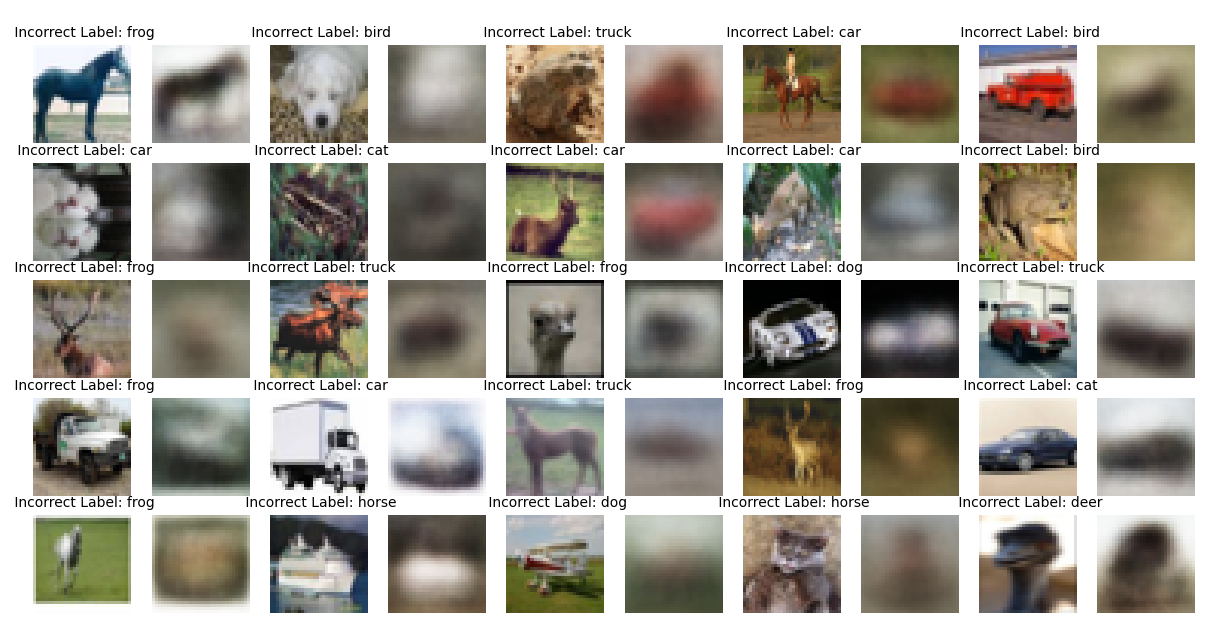

In [ ]:
j = 0
fig = plt.figure(figsize=(15,15))
for i in range(25):
    lbl_corr = labels[i]
    img_corr = images[i]
    img_new = X_hat1[i]
    lbl_new = labels_c[i]
    j = j+1
    ax = fig.add_subplot(10, 10,j )
    ax.axis("off")
    ax.imshow(np.transpose(img_corr.squeeze(0).cpu().numpy(), (1, 2, 0)))   
    ax.set_title(f'\n Incorrect Label: {classes[lbl_new.detach()]}',fontsize=10)  
    j = j+1
    ax = fig.add_subplot(10, 10, j)
    ax.axis("off")
    ax.imshow(np.transpose(img_new.squeeze(0).cpu().detach().numpy(), (1, 2, 0))) 